# Imports

In [1]:
from IPython.display import HTML, display

css_file = "resources/style.css"
with open(css_file, "r") as f:
    css = f.read()
display(HTML(f"<style>{css}</style>"))

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "serif"

import time

from scipy.constants import e, k, m_e
from scipy.integrate import solve_ivp

---

# Theory

## Classical Transport Theory 
Based on _Thermal Physics_ by Kittel.
### General Boltzmann Transport Equation
The Boltzmann Transport Equation (BTE) takes place in the six-dimensional space of coordinates given by $\textbf{r}$ for the spacial coordinates and $\textbf{v}$ for the velocity (or momentum) space. The classical distribution function is given by
$$
\begin{equation*}
    f(\textbf{r},\textbf{v})d\textbf{r}d\textbf{v}=\text{num of particles in }d\textbf{r}d\textbf{v}
\end{equation*}
$$
If we consider the effect on a time scale $dt$, according to the Liouville theorem of classicla mechanics, if we have a volume element along a conserved flow-line the distribution is given by
$$
\begin{equation*}
    f(t+dt,\textbf{r}+d\textbf{r}, \textbf{v}+d\textbf{v})=f(t,\textbf{r},\textbf{v})
\end{equation*}
$$
However, in the presence of collisions, we find that
$$
\begin{equation*}
    f(t+dt,\textbf{r}+d\textbf{r}, \textbf{v}+d\textbf{v})-f(t,\textbf{r},\textbf{v})=dt\left(\frac{\partial f}{\partial t}\right)_\text{coll}
\end{equation*}
$$
therefore
$$
\begin{equation*}
    dt\left(\frac{\partial f}{\partial t}\right) + d\textbf{r}\cdot\nabla_\textbf{r}f+d\textbf{v}\cdot\nabla_\textbf{v}f=dt\left(\frac{\partial f}{\partial t}\right)_\text{coll}
\end{equation*}
$$
if we now denote $\boldsymbol{\alpha}$ as the acceleration $d\textbf{v}/dt$, we find
$$
\begin{align*}
    \frac{\partial f}{\partial t}+\textbf{v}\cdot\nabla_\textbf{r}f+\boldsymbol{\alpha}\cdot\nabla_\textbf{v}f=\left(\frac{\partial f}{\partial t}\right)_\text{coll}
\end{align*}
$$

#### BTE in 0D with an Applied Electric Field 
If we start by taking the BTE and reducing it to 1D, specifically the Cartesian $x$-direction, we find that the BTE becomes
$$
\begin{equation*}
    \frac{\partial f}{\partial t}+v\frac{\partial f}{\partial x}+\alpha_x\frac{\partial f}{\partial v}=\left(\frac{\partial f}{\partial t}\right)_\text{coll}
\end{equation*}
$$
we know need to find an expression for the acceleration term. We know that the acceleration in an applied electric field can easily be derived from Newton's Second Law:
$$
\begin{align*}
    \textbf{F}&=m\textbf{a}=m\frac{d\textbf{v}}{dt}\\
    \therefore qE&=m\frac{dv}{dt}=m\alpha_x\\
    \longrightarrow \alpha_x&=\frac{qE}{m}
\end{align*}
$$
therefore the BTE becomes
$$
\begin{equation*}
    \boxed{\frac{\partial f}{\partial t}+v\frac{\partial f}{\partial x}+\frac{qE}{m}\frac{\partial f}{\partial v}=\left(\frac{\partial f}{\partial t}\right)_\text{coll}}
\end{equation*}
$$

#### Steady-State BTE in 0D with an Applied Electric Field
The BTE reduced to 0D becomes
$$
\begin{equation*}
    \frac{\partial f}{\partial t} + \alpha\frac{\partial f}{\partial v}=\left(\frac{\partial f}{\partial t}\right)_\text{coll}
\end{equation*}
$$
we know need to find an expression for the acceleration term. We know that the acceleration in an applied electric field can easily be derived from Newton's Second Law:
$$
\begin{align*}
    \textbf{F}&=m\textbf{a}=m\frac{d\textbf{v}}{dt}\\
    \therefore qE&=m\frac{dv}{dt}=m\alpha_x\\
    \longrightarrow \alpha_x&=\frac{qE}{m}
\end{align*}
$$
we also know that at equilibrium, $\partial f/\partial t=0$. Therefore the BTE becomes
$$
\begin{equation*}
    \frac{qE}{m}\frac{\partial f}{\partial v}=\left(\frac{\partial f}{\partial t}\right)_\text{coll}
\end{equation*}
$$
We can futher reduce this by using the relaxation time approximation, which is given by
$$
\begin{equation*}
    \left(\frac{\partial f}{\partial t}\right)_\text{coll}=\frac{f_0-f}{\tau_c}
\end{equation*}
$$
Therefore, the final expression to plot is
$$
\begin{equation*}
    \frac{qE}{m^*}\frac{\partial f}{\partial v}=\frac{f_0-f}{\tau_c}
\end{equation*}
$$

## Semi-Classical Transport Theory
This derivation is from: [https://transport.ece.illinois.edu/ECE539S12.html](https://transport.ece.illinois.edu/ECE539S12.html)

Semi-Classical transport theory changes from position-velocity phase space to position-momentum phase space. The first step is to acknoledge that the BTE becomes
$$
\begin{align*}
    \frac{\partial f}{\partial t}+\textbf{v}\cdot\nabla_\textbf{r}+\frac{e\textbf{E}}{\hbar}\cdot\nabla_\textbf{k}f &= \sum_{\textbf{k}^\prime}\left[S(\textbf{k}^\prime,\textbf{k})f(\textbf{r},\textbf{k}^\prime,t)\left\{1-f(\textbf{r},\textbf{k},t)\right\}\right. \\ 
    &\qquad\quad \ \ \left.- S(\textbf{k},\textbf{k}^\prime)f(\textbf{r},\textbf{k},t)\left\{1-f(\textbf{r},\textbf{k}^\prime,t)\right\}\right]
\end{align*}
$$
where $\textbf{r}$ is the position, $\textbf{k}$ is the momentum, $f(\textbf{k},t)$ is the distribution function, $\textbf{v}$ is the _group_ velocity, $\textbf{E}$ is the electric field, $S(\textbf{k},\textbf{k}^\prime)$ is the transition probablity between momentum states $\textbf{k}$ and $\textbf{k}^\prime$, and $[1-f(\textbf{r},\textbf{k}^\prime,t)]$ is the probablity of non-occupation for a momentum state $\textbf{k}^\prime$. It is important to note that the summation on the right-hand side of the equation is the collision term which represents scattering effects. This is a direct formula expanded from the classical formulation of $(\partial f/\partial t)_\text{coll}$. 

In the simplest approach, we can use the Relaxation Time Approximation to approximate the collision terms (RHS), which is a _phenomenological_ approximation given by
$$
\begin{equation*}
    \frac{f_0-f(\textbf{r},\textbf{k},t)}{\tau_c}
\end{equation*}
$$
where $f_0$ indicates the local equilibrium distribution function and $\tau_c$ is the _microscopic_ relaxation time. In equilibrium, we can use the Maxwell-Boltzmann distribution given by
$$
\begin{equation*}
    f_0(\textbf{r},\textbf{v})=n(\textbf{r})\left(\frac{2\pi k_BT_0}{m^*}\right)^{3/2}\exp\left(-\frac{m^*|\textbf{v}|^2}{2k_BT_0}\right)
\end{equation*}
$$
where $n(\textbf{r})$ is the carrier density, $T_0$ is the lattice temperature, $k_B$ is the Boltzmann constant, and $m^*$ is the effective mass. 

The carrier density is also directly related to the distribution function
$$
\begin{equation*}
    n(\textbf{r})= f(\textbf{r},\textbf{v})d\textbf{v}
\end{equation*}
$$
This approximation's significance can be seen when the electric field is shut off instantaneously and a spatially-independent solution is considered. The BTE then becomes
$$
\begin{equation*}
    \frac{\partial f}{\partial t} = \frac{f_0-f}{\tau_c}
\end{equation*}
$$

### Derivation of the Drift-Diffusion Model
If we now consider the semi-classical formulation of the BTE, we can now flatten the equation into 1D and focus on the Cartesian $x$-direction. The resultant BTE becomes
$$
\begin{equation*}
    \frac{eE}{m^*}\frac{\partial f}{\partial v}+v\frac{\partial f}{\partial x}=\frac{f_0-f(x,v)}{\tau_c}
\end{equation*}
$$
Note, the relation $m^*v=\hbar k$ is _only_ valid for a **parabolic energy band**. A general definition of the current density is
$$
\begin{equation*}
    J(x)=e\int vf(x,v)dv
\end{equation*}
$$
where the integral represents the **first moment of the distribution function**. If we now relate this back to the BTE, we find
$$
\begin{equation*}
    \frac{1}{\tau_c}\left[\int vf_0dv - \int vf(x,v)dv\right]=-\frac{J(x)}{e\tau_c}
\end{equation*}
$$
We know that the equilibrium distribution function is symmetric in the velocity domain, therefore it's integral is zero. Which leaves us with
$$
\begin{equation*}
    J(x)=-e\frac{e\tau_c}{m^*}E\int v\frac{\partial f}{\partial v}dv - e\tau_c\frac{d}{dx}\int v^2f(x,v)dv
\end{equation*}
$$
when we integrate by parts, we find
$$
\begin{equation*}
    \int v\frac{\partial f}{\partial t}=\underbrace{\left[vf(x,v)\right]_{-\infty}^\infty}_{=0}-\int f(x,v)dv = -n(x)
\end{equation*}
$$
which gives
$$
\begin{equation*}
    \int v^2 f(x,v)dv = n(x)\langle v^2\rangle 
\end{equation*}
$$
where $\langle v^2\rangle $ is the average of the square velocity given by
$$
\begin{equation*}
    \langle v^2\rangle = \frac{1}{n}\int v^2f(x,v)dv
\end{equation*}
$$
In 1D, the $-3/2$ exponent can be replaced with $-1/2$ for the Maxwell-Boltzmann distribution, where the kinetic energy becomes $k_BT_0/2$. The mobility is defined as $\mu=e\tau_c/m^*$, the averaged velocity squared, at equilibrium, becomes $\langle v^2\rangle = k_BT_0/m^*$. Therefore we neglect thermal effects. The diffusion coefficient, $D$ can be derived from Einstein's relation, which gives $D=\mu k_BT_0/e$. The drift-diffusion current is therefore
$$
\begin{align*}
    J_n(x)&=qn(x)\mu_nE(x)+qD_n\frac{\partial n}{\partial x} \\
    J_p(x)&=qp(x)\mu_pE(x)-qD_p\frac{\partial p}{\partial x}
\end{align*}
$$

The complete set of the drift-diffusion equations can be stated as set of equations.
1. Current Equations: $$\begin{align*}\textbf{J}_n&=qn\mu_n\textbf{E}+qD_n\nabla n \\ \textbf{J}_p&=qp\mu_p\textbf{E}-qD_p\nabla p\end{align*}$$
2. Continuity Equations: $$\begin{align*}\frac{\partial n}{\partial t}&=\frac{1}{q}\nabla\cdot\textbf{J}_n+U_n \\ \frac{\partial p}{\partial t}&=-\frac{1}{q}\nabla \cdot \textbf{J}_p+U_p\end{align*}$$
3. Poisson's Equation: $$\begin{equation*}\nabla^2V=\frac{q}{\varepsilon_0}(n-p+N_A^-N_D^-)\end{equation*}$$

where $U_n$ and $U_p$ are the generation-recombination rates, $N_A^+$ is the acceptor concentration, and $N_D^-$ is the donor concentration. 

#### Spacial and Time Scale Requirements
A mesh _must_ be smaller than the **Debye Length**. In this case, the _space decay constant_ is set to be equal to the Debye Length, which is given by
$$
\begin{equation*}
    L_D=\sqrt{\frac{\varepsilon k_BT}{q^2N}}
\end{equation*}
$$
where $N$ is the doping. 

The _dielectric relaxation time_ is the characteristic time for **charge fluctuations** to decay under the influence of their own field. The DRT can be approximated by
$$
\begin{equation*}
    t_\text{drt}=\frac{\varepsilon}{qN\mu}
\end{equation*}
$$

## Discussion of Collision Models
For our purposes, we are _solely_ looking at 1D models. Starting with Deterministic then evolving to Stochastic. 
### Deterministic Model: Relaxation Time Approximation
We can use the approximation made during the Drift-Diffusion derivation and use a deterministic finite-difference formulation. If we assume that the collisions are given by
$$
\begin{equation*}
    \left(\frac{\partial f}{\partial t}\right)_\text{coll}=\frac{f_0-f}{\tau_c}
\end{equation*}
$$
our application of the 0D Boltzmann equation will become much simpler. 
#### Formulation of Semi-Classical 0D BTE with an Applied Electric Field at Equilibrium using the RTA
To switch from classical to semi-classical we must first switch in terms of the effective mass, given by $m^*$. The BTE becomes
$$
\begin{equation*}
    \boxed{\frac{qE}{m^*}\frac{\partial f}{\partial v}=\frac{f_0-f}{\tau_c}}
\end{equation*}
$$
and we know that in one dimension, the Maxwell-Boltzmann distribution becomes
$$
\begin{equation*}
f_0(v)=n\sqrt{\frac{2\pi k_BT_0}{m^*}}\exp\left(-\frac{m^*|v|^2}{2k_BT_0}\right)
\end{equation*}
$$ 

---

# Numerical Discretization Schemes and Algorithm
## Deterministic Model: Relaxation Time Approximation
Let's first rework our equation into a standard ODE that we can solve:
$$
\begin{equation*}
    \frac{df(v)}{dv}=\frac{m^*}{qE\tau_c}\left(f_0-f(v)\right)
\end{equation*}
$$
We can start by defining the constants needed:

In [2]:
constants = {
    "mstar": 1.18 * m_e,
    "q": e,
    "k": k,
    "T0": 300,
    "tau_c": 200e-15,
    "ni": 1e5,
}

Now let's define a function for the Maxwell-Boltzmann distribution:

In [3]:
def f0(v, **constants):
    mstar = constants["mstar"]
    kB = constants["k"]
    T = constants["T0"]
    ni = constants["ni"]

    prefactor = np.sqrt(mstar / (2 * np.pi * kB * T))
    expfactor = np.exp(-mstar * np.abs(v) ** 2 / (2 * k * T))

    return ni * prefactor * expfactor

Now let's define a function for the total integrand:

In [4]:
def df(v, f, E, **constants):
    mstar = constants["mstar"]
    tau_c = constants["tau_c"]
    q = constants["q"]

    alpha = mstar / (q * E * tau_c)

    return alpha * (f0(v, **constants) - f)

Now let's create a wrapper function to easily run this calculation and plot for multiple $E$ values. 

In [ ]:
def evalBoltzmann(E, f0, dfdv, userinput=True, IC=None, plot=True, **constants):
    if userinput == True:
        N = int(input("Grid Size: "))
        Vmax = float(input("Max Velocity: "))
        Vmin = float(input("Min Velocity (mag): "))
    else:
        N = IC["N"]
        Vmax = IC["Vmax"]
        Vmin = IC["Vmin"]

    start_time = time.time()

    V = np.linspace(-Vmin, Vmax, N)

    cmap = plt.get_cmap("plasma", len(E))
    colors = cmap(np.arange(len(E)))

    if plot == True:
        plt.figure(figsize=(12, 6))

    solutions = []
    for Efield, color in zip(E, colors):

        f_init = f0(-Vmax, **constants)
        sol = solve_ivp(
            fun=lambda v, f: dfdv(v, f, E=Efield, **constants),
            t_span=(-Vmin, Vmax),
            y0=[f_init],
            t_eval=V,
            method="RK45",
        )
        v = sol.t
        f = sol.y[0]

        solutions.append({"E": Efield, "v": v, "f": f})
        if plot == True:
            plt.plot(v, f / np.max(f), label=f"E = {Efield}", color=color)

    if plot == True:
        plt.plot(
            v, f0(v, **constants) / np.max(f0(v, **constants)), "--", label=r"$f_0(v)$"
        )

        plt.xlabel("Velcoity (m/s)")
        plt.ylabel("Normalized $f(v)$")
        plt.legend()
        plt.title(
            f"RK4 Simulatiuon of the 0D Boltzmann Equation with an Applied E-Field ({N} Mesh Pts.)"
        )
        plt.show()

    end_time = time.time()
    total_time = end_time - start_time
    print(f"Computation took {round(total_time,3)} seconds.")

    return solutions, total_time

In [ ]:
E = np.logspace(3, 6, 4)
determ_solutions_10 = evalBoltzmann(E, f0, df, **constants)

## Monte-Carlo Method

Let’s first restate the Boltzmann equation in the form we’ll approximate via Monte‑Carlo sampling of free‑flight and collisions:

$$
\begin{equation*}
    \frac{df(v)}{dv} = \frac{m^*}{q\,E\,\tau_c}\,\bigl(f_0(v) - f(v)\bigr)
\end{equation*}
$$

We’ll simulate each “particle” as accelerating under $a=qE/m^*$ between collisions (with collision times drawn from an exponential of mean $\tau_c$, 
and at each collision we reset the velocity by sampling from the Maxwell–Boltzmann distribution $f_0(v)$. We can evaulate the thermal velocity as
$$
\begin{equation*}
    v_\text{th}=\sqrt{\frac{k_BT_0}{m^*}}
\end{equation*}
$$

Now let's develop the Monte-Carlo variation to find the sample velocities for the given $E$-field and number of particles ($N_p$):

In [5]:
def MonteCarloCollision(E, Np, **constants):
    kB = constants["k"]
    T0 = constants["T0"]
    q = constants["q"]
    mstar = constants["mstar"]
    tau_c = constants["tau_c"]

    vth = np.sqrt(kB * T0 / mstar)

    acceleration = q * E / mstar
    V0 = np.random.normal(0, vth, size=Np)
    dt = np.random.exponential(tau_c, size=Np)

    v_samp = V0 + acceleration * dt
    return v_samp

Now let's create the wrapper function to test different $E$-fields.

In [ ]:
def evalBoltzmannMC(E, f0, userinput=True, IC=None, plot=True, **constants):
    # Inputs
    if userinput == True:
        N = int(input("Number of Monte Carlo samples: "))
        Nbins = int(input("Velocity grid size (histogram bins): "))
        Vmax = float(input("Max velocity for histogram (+): "))
        Vmin = float(input("Min velocity (mag) for histogram (-): "))
    else:
        N = IC["N"]
        Nbins = IC["Nbins"]
        Vmax = IC["Vmax"]
        Vmin = IC["Vmin"]

    start_time = time.time()

    # Bin Creation
    edges = np.linspace(-Vmin, Vmax, Nbins + 1)
    centers = (edges[:-1] + edges[1:]) / 2

    if plot == True:
        plt.figure(figsize=(12, 6))

    cmap = plt.get_cmap("plasma", len(E))
    colors = cmap(np.arange(len(E)))

    solutions = []
    # Iterating through all E-Fields
    for Efield, color in zip(E, colors):
        v_samples = MonteCarloCollision(Efield, N, **constants)

        hist, _ = np.histogram(v_samples, bins=edges, density=True)
        hist /= np.max(hist)

        if plot == True:
            plt.plot(centers, hist, label=f"E = {Efield} V/m", color=color)

        solutions.append({"E": Efield, "v_samples": v_samples, "hist": hist})

    if plot == True:
        f0_vals = f0(centers, **constants)
        plt.plot(centers, f0_vals / np.max(f0_vals), "--", label=r"$f_0(v)$")

        plt.xlabel("Velocity (m/s)")
        plt.ylabel("Normalized $f(v)$")
        plt.title(
            f"Monte Carlo Simulation of the 0D Boltzmann with an Applied E-Field ({N:.0E} Particles with {Nbins} Bins)"
        )
        plt.legend()
        plt.show()

    end_time = time.time()
    total_time = end_time - start_time
    print(f"Computation took {round(total_time,3)} seconds.")

    return solutions, total_time

Now let's plot the results.

In [ ]:
E = np.logspace(3, 6, 4)
MC_sols = evalBoltzmannMC(E, f0, **constants)

This results is _very_ similar to the deterministic approach, except under high $E$-fields. 

## Validation and Benchmarking Strategies
Let's do a grid refinement analysis of our solutions.

### 150 Mesh Points

In [ ]:
IC_rk4_150 = {"N": 150, "Vmax": 1.5e6, "Vmin": 1e6}
f_rk4_150, _ = evalBoltzmann(E, f0, df, userinput=False, IC=IC_rk4_150, **constants)

IC_MC_150 = {"N": 20000000, "Nbins": 150, "Vmax": 1.5e6, "Vmin": 1e6}
f_MC_150, _ = evalBoltzmannMC(E, f0, userinput=False, IC=IC_MC_150, **constants)

### 300 Mesh Points

In [ ]:
IC_rk4_300 = {"N": 300, "Vmax": 1.5e6, "Vmin": 1e6}
f_rk4_300, _ = evalBoltzmann(E, f0, df, userinput=False, IC=IC_rk4_300, **constants)

IC_MC_300 = {"N": 40000000, "Nbins": 300, "Vmax": 1.5e6, "Vmin": 1e6}
f_MC_300, _ = evalBoltzmannMC(E, f0, userinput=False, IC=IC_MC_300, **constants)

### 600 Mesh Points

In [ ]:
IC_rk4_600 = {"N": 600, "Vmax": 1.5e6, "Vmin": 1e6}
f_rk4_600, _ = evalBoltzmann(E, f0, df, userinput=False, IC=IC_rk4_600, **constants)

IC_MC_600 = {"N": 80000000, "Nbins": 600, "Vmax": 1.5e6, "Vmin": 1e6}
f_MC_600, _ = evalBoltzmannMC(E, f0, userinput=False, IC=IC_MC_600, **constants)

### 1200 Points

In [ ]:
IC_rk4_1200 = {"N": 1200, "Vmax": 1.5e6, "Vmin": 1e6}
f_rk4_1200, _ = evalBoltzmann(
    E, f0, df, userinput=False, IC=IC_rk4_1200, **constants
)

IC_MC_1200 = {"N": 160000000, "Nbins": 1200, "Vmax": 1.5e6, "Vmin": 1e6}
f_MC_1200, _ = evalBoltzmannMC(E, f0, userinput=False, IC=IC_MC_1200, **constants)

### 2,400 Mesh Points

In [ ]:
IC_rk4_2400 = {"N": 2400, "Vmax": 1.5e6, "Vmin": 1e6}
f_rk4_2400, _ = evalBoltzmann(
    E, f0, df, userinput=False, IC=IC_rk4_2400, **constants
)

IC_MC_2400 = {"N": 320000000, "Nbins": 2400, "Vmax": 1.5e6, "Vmin": 1e6}
f_MC_2400, _ = evalBoltzmannMC(E, f0, userinput=False, IC=IC_MC_2400, **constants)

## Full Mesh Analysis

In [ ]:
rk4_conditions = [IC_rk4_150, IC_rk4_300, IC_rk4_600, IC_rk4_1200, IC_rk4_2400]
MC_conditions = [IC_MC_150, IC_MC_300, IC_MC_600, IC_MC_1200, IC_MC_2400]

rk4_times = []
MC_times = []
rk4_solutions = []
MC_solutions = []
# Loop through the conditions and run the simulations

for IC_rk4_n, IC_MC_n in zip(rk4_conditions, MC_conditions):
    times_rk4 = []
    times_MC = []
    sol_rk4 = []
    sol_MC = []
    for _ in range(10):
        sol_rk4_n, time_rk4_n = evalBoltzmann(
            E, f0, df, userinput=False, IC=IC_rk4_n, plot=False, **constants
        )
        sol_MC_n, time_MC_n = evalBoltzmannMC(
            E, f0, userinput=False, IC=IC_MC_n, plot=False, **constants
        )
        times_rk4.append(time_rk4_n)
        times_MC.append(time_MC_n)
        sol_rk4.append(sol_rk4_n)
        sol_MC.append(sol_MC_n)

    rk4_times.append(times_rk4)
    MC_times.append(times_MC)
    rk4_solutions.append(sol_rk4)
    MC_solutions.append(sol_MC)
    print("loop completed")

In [ ]:
mesh_vals = [150, 300, 600, 1200, 2400]
methods = ["RK4", "Monte-Carlo"]

rk4_mean = rk4_times.mean(axis=1)
rk4_std = rk4_times.std(axis=1)
MC_mean = MC_times.mean(axis=1)
MC_std = MC_times.std(axis=1)

fig, ax1 = plt.subplots(figsize=(8, 6))

ax2 = ax1.twinx()

ax1.errorbar(
    mesh_vals, 
    rk4_mean, 
    yerr=rk4_std, 
    fmt="o-", 
    capsize=5, 
    label="RK4"
)
ax1.set_xlabel("Mesh Resolution")
ax1.set_ylabel("RK4 Time (s)")
ax1.tick_params(axis="y", labelcolor="C0")

ax2.errorbar(
    mesh_vals,
    MC_mean,
    yerr=MC_std,
    fmt="s--",
    capsize=5,
    label="Monte-Carlo",
    color="C1",
)
ax2.set_ylabel("Monte-Carlo Time (s)")

# Title and legends
fig.suptitle("Execution Time vs. Mesh Resolution for RK4 and Monte-Carlo Methods")
ax1.legend(loc="upper left", bbox_to_anchor=(0.02, 0.98))
ax2.legend(loc="upper left", bbox_to_anchor=(0.02, 0.90))

#plt.savefig("figures/ExecutionTime.png", dpi=300, bbox_inches="tight")
plt.show()

### Error Calculations

In [20]:
def evaluate(Nvals, Evals, **constants):
    Vmax, Vmin = 0.75e6, -0.5e6

    # reference solutions
    N_ref = Nvals[-1]
    V_ref = np.linspace(Vmin, Vmax, N_ref)
    edges_ref = np.linspace(Vmin, Vmax, N_ref + 1)
    # precompute reference RK4
    ref_f_rk4 = []
    for Efield in Evals:
        sol = solve_ivp(
            fun=lambda v, f: df(v, f, E=Efield, **constants),
            t_span=(Vmin, Vmax),
            y0=[f0(Vmin, **constants)],
            t_eval=V_ref,
            method="RK45",
        )
        ref_f_rk4.append(sol.y[0])
    ref_f_rk4 = np.array(ref_f_rk4)
    # precompute reference MC
    Np_ref = int(1e7 * (2**len(Nvals)))
    ref_f_MC = []
    for Efield in Evals:
        samples = MonteCarloCollision(Efield, Np_ref, **constants)
        hist, _ = np.histogram(samples, bins=edges_ref, density=True)
        ref_f_MC.append(hist)
    ref_f_MC = np.array(ref_f_MC)

    # set up figures
    figs_axes = []
    titles = [
        "RK4 Error Percent versus Reference",
        "MC Error Percent versus Reference",
        "Absolute Percent Difference Between RK4 and MC",
        "RK4 Percent Deviation from Ideal Maxwell-Boltzmann Distribution",
        "MC Percent Deviation from Ideal Maxwell-Boltzmann Distribution",
        "Mesh Resolution vs. RK4 Error from Reference",
        "Mesh Resolution vs. MC Error from Reference"
    ]
    ylabels = ["Percent error"]*3 + ["Percent deviation"]*2 + ['Percent Error']*2
    xlabels = ["Velocity (m/s)"]*5 + ['Mesh Resolution (N)']*4
    for title, ylabel, xlabel in zip(titles, ylabels, xlabels):
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.grid(True, linestyle="--", alpha=0.5)
        figs_axes.append((fig, ax))

    # cmpas
    cmap_names = ["Blues", "Greens", "Reds", "Greys"]

    # error loop over all but the last (reference) N
    for i, (N, Np) in enumerate(zip(reversed(Nvals[:-1]), reversed([int(1e7 * (2**i)) for i in range(len(Nvals)-1)]) )):
        V = np.linspace(Vmin, Vmax, N)
        edges = np.linspace(Vmin, Vmax, N + 1)
        centers = (edges[:-1] + edges[1:]) / 2
        RF = N_ref // N  # reduct factor

        # pick a distinct colormap for this N
        cmap_name = cmap_names[i % len(cmap_names)]
        cmap = plt.get_cmap(cmap_name, len(Evals))

        for idx, Efield in enumerate(Evals):
            color = cmap(idx)

            # rk4 sol
            sol = solve_ivp(
                fun=lambda v, f: df(v, f, E=Efield, **constants),
                t_span=(Vmin, Vmax),
                y0=[f0(Vmin, **constants)],
                t_eval=V,
                method="RK45",
            )
            f_rk4 = sol.y[0]
            
            # reduct
            f_ref_rk4_reduced = ref_f_rk4[idx].reshape(-1, RF).mean(axis=1)

            # rk4 error vs ref
            err1 = np.abs(f_rk4 - f_ref_rk4_reduced) / np.max(f_ref_rk4_reduced)
            figs_axes[0][1].plot(V, err1*100, label=f"E={Efield:.0E}, N={N}", color=color)

            # rk4 error vs f0
            f0_val = f0(V, **constants)
            err4 = np.abs(f_rk4 - f0_val) / np.max(f0_val) * 100
            figs_axes[3][1].plot(V, err4, label=f"E={Efield:.0E}, N={N}", color=color)

            # mc sol
            samples = MonteCarloCollision(Efield, Np, **constants)
            hist, _ = np.histogram(samples, bins=edges, density=True)
            f_mc = hist / np.max(hist)
            
            # reduct
            f_ref_MC_reduced = ref_f_MC[idx].reshape(-1, RF).mean(axis=1)

            # mc error vs ref
            err2 = np.abs(hist - f_ref_MC_reduced) / np.max(f_ref_MC_reduced)
            figs_axes[1][1].plot(centers, err2*100, label=f"E={Efield:.0E}, N={N}", color=color)

            # mc vs f0
            f0_cent = f0(centers, **constants) / np.max(f0(centers, **constants))
            err5 = np.abs(f_mc - f0_cent) / np.max(f0_cent) * 100
            figs_axes[4][1].plot(centers, err5, label=f"E={Efield:.0E}, N={N}", color=color)

            # absolute difference between rk4 and mc errors
            err3 = np.abs(err1 - err2)
            figs_axes[2][1].plot(V, err3*100, label=f"E={Efield:.0E}, N={N}", color=color)

            # Mesh v. Error
            figs_axes[5][1].errorbar(x=N, y=np.abs(err1.mean())*100, yerr=np.abs(err1.std())*100, marker="x", color=color, label=f'E={Efield:.0E}')
            figs_axes[6][1].errorbar(x=N, y=np.abs(err2.mean())*100, yerr=np.abs(err2.std())*100, marker="x", color=color, label=f'E={Efield:.0E}')

    # finalize & save
    for fig, ax in figs_axes:
        ax.legend(loc="upper right", fontsize="small", ncol=2)
        fig.tight_layout()
        fn = fig.axes[0].get_title().replace("/", "_")
        fig.savefig(f"figures/{fn}.png", dpi=300, bbox_inches="tight")
    plt.show()


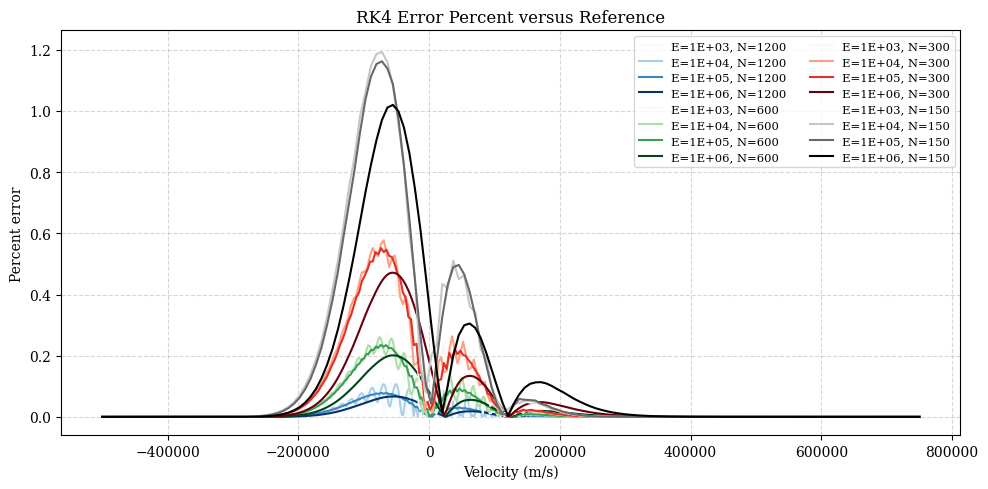

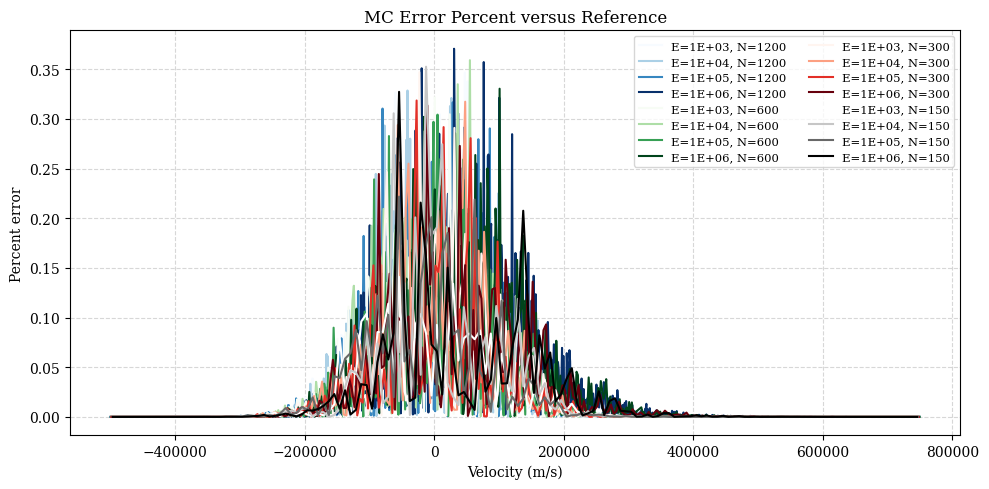

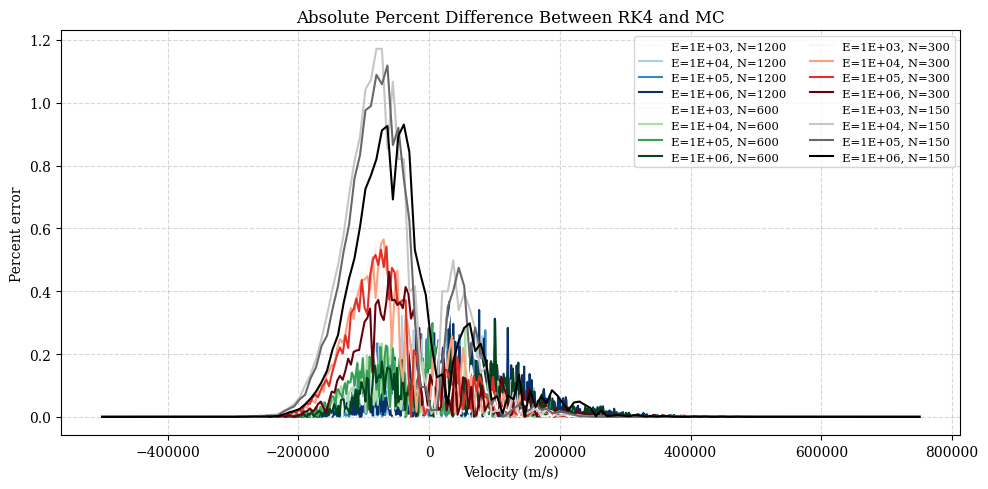

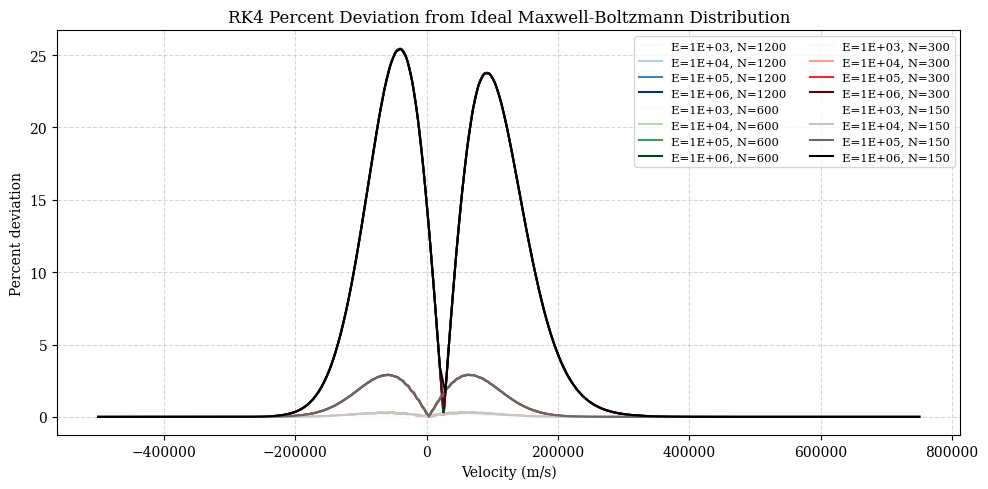

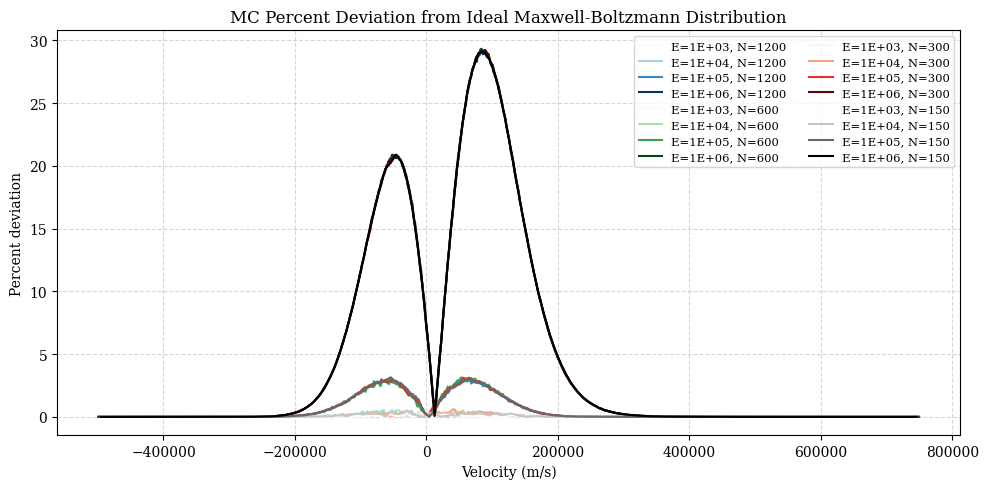

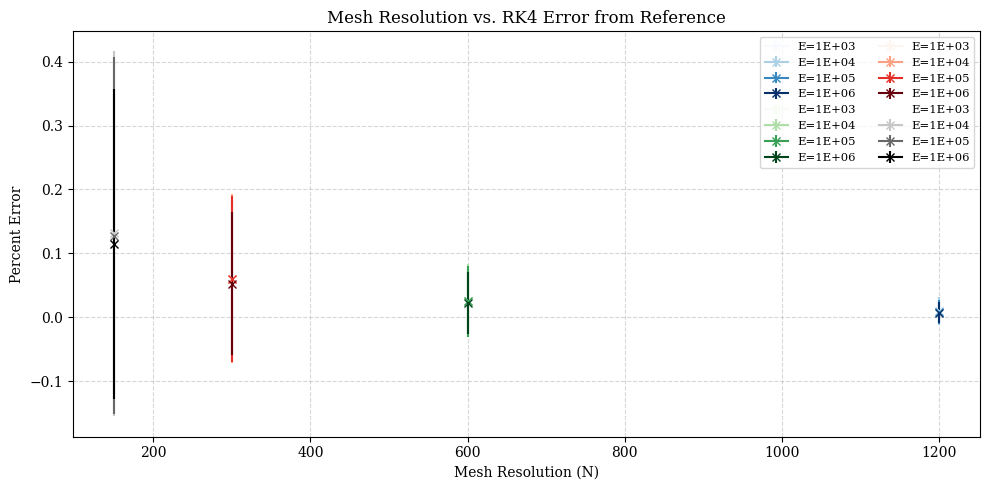

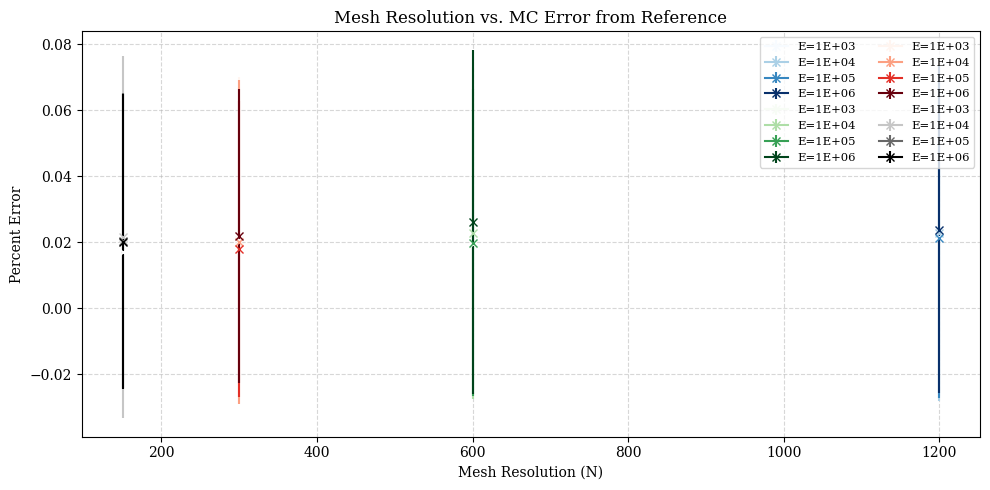

In [21]:
E = np.logspace(3, 6, 4)
N = [150, 300, 600, 1200, 2400]
evaluate(N, E, **constants)